In [1]:
from numpy import loadtxt
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [2]:
#데이터 로드하기 
dataset = pd.read_csv('../XAI_study/data/diabetes/diabetes.csv', delimiter=',')

In [3]:
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
#데이터 로드하기 
dataset = pd.read_csv('../XAI_study/data/diabetes/diabetes.csv', delimiter=',')

#X와 y로 데이터 분리 
y = dataset['Outcome']
X = dataset.drop(columns = ['Outcome'])

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#학습 데이터로 모델 학습 시키기 
model = XGBClassifier() #max_depth 옵션을 조절해 의사 결정 트리의 깊이를 조절할 수 있음 
model.fit(X_train, y_train)

#예측하기 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

#평가하기 
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {round(accuracy * 100)}%')

[14:14:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 73%


/home/sojihae99/miniconda3/envs/xai/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


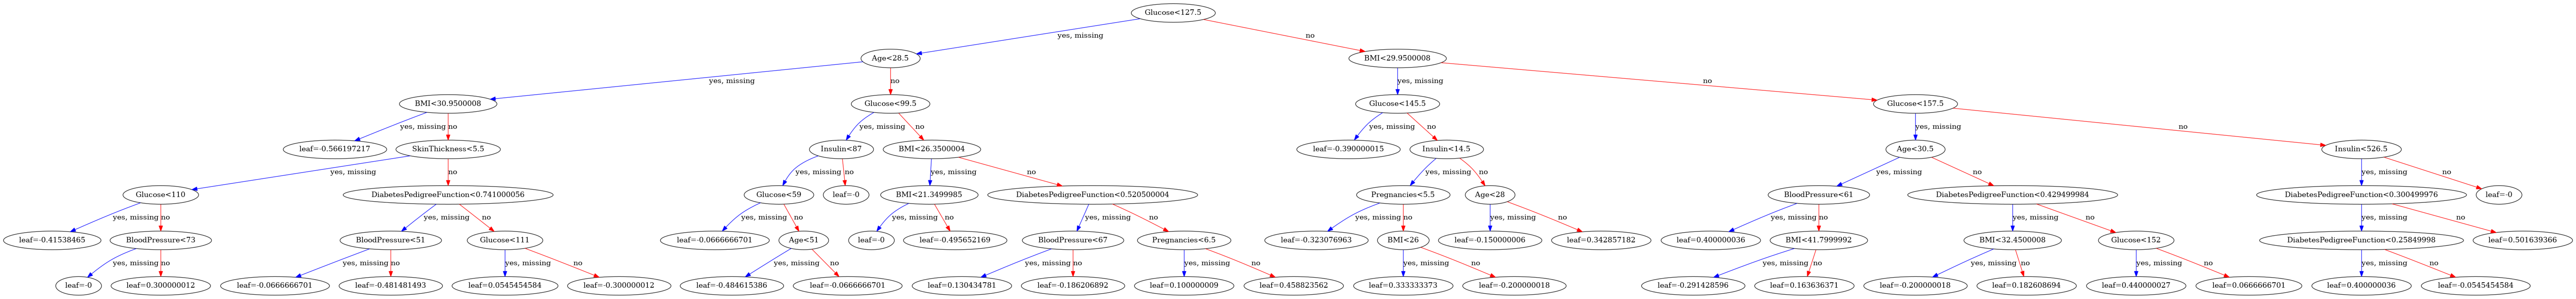

In [5]:
#의사결정 시각화 
%matplotlib inline 
from xgboost import plot_tree 
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt 

rcParams['figure.figsize'] = 200, 400

#의사 결정 트리 시각화 
plot_tree(model)
plt.show()

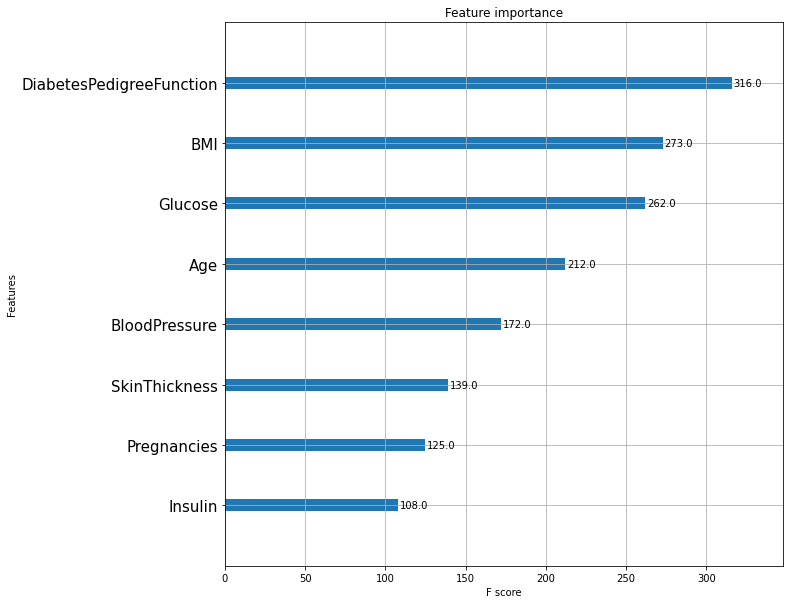

In [6]:
#당뇨병 진단 모델의 피쳐 중요도를 계산하고 시각화하는 코드 
from xgboost import plot_importance 
rcParams['figure.figsize'] = 10, 10
plot_importance(model)
'''
plot_importance는 학습된 모델을 가지고 각 피쳐를 분해해 중요도 행렬을 계산 
중요도 행렬은 의사 결정 트리와 유사하게 피쳐의 중요성을 줄세우기하고, 각 피쳐의 커버리지, 정보 이득값을 계산 
plot_importance는 중요도 행렬의 결과괎을 F-measure 점수로 표현하고 정렬 
'''
plt.yticks(fontsize = 15)
plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


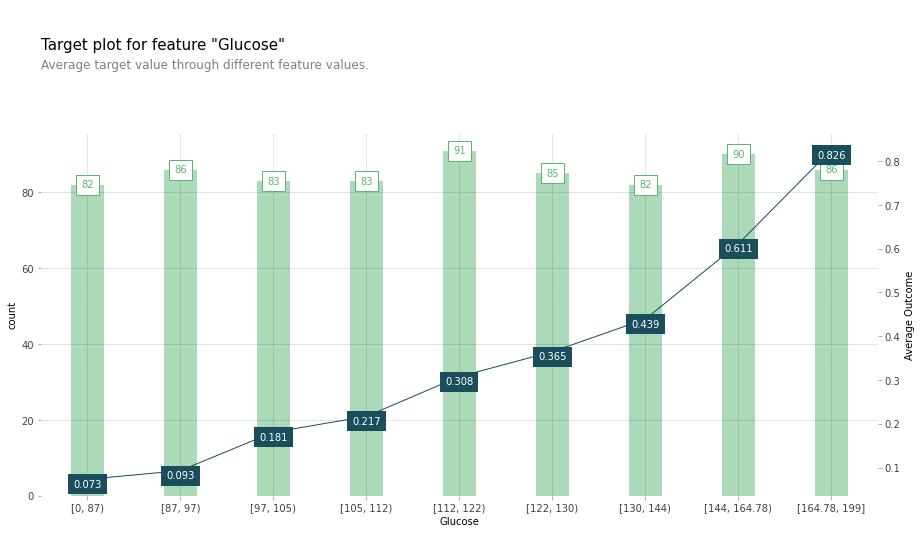

In [10]:
#pdpbox를 사용해 GTT 피쳐에 대한 목표 플롯을 그리는 코드 
from pdpbox import info_plots

pima_data = dataset 
pima_features = dataset.columns[:8]
pima_target = dataset.columns[8]

fig, axes, summary_df = info_plots.target_plot(
    df = pima_data,
    feature = 'Glucose',
    feature_name = 'Glucose',
    target = pima_target
)
'''
info_plots.target_plot은 학습한 모델을 파라미터로 받지 않음 
=> 모델을 파라미터로 이용하지 않으면서 모델을 설명하는 일이 가능?
=> 가능하다고 함 

=>일반적으로 트레이닝 데이터를 만들 때 레이블이 균등한 분포를 가져야함 
'''

In [11]:
summary_df

,x,display_column,value_lower,value_upper,count,Outcome
0,0,"[0, 87)",0.000000,87.000000,82,0.073171
1,1,"[87, 97)",87.000000,97.000000,86,0.093023
2,2,"[97, 105)",97.000000,105.000000,83,0.180723
3,3,"[105, 112)",105.000000,112.000000,83,0.216867
4,4,"[112, 122)",112.000000,122.000000,91,0.307692
5,5,"[122, 130)",122.000000,130.000000,85,0.364706
6,6,"[130, 144)",130.000000,144.000000,82,0.439024
7,7,"[144, 164.78)",144.000000,164.777778,90,0.611111
8,8,"[164.78, 199]",164.777778,199.000000,86,0.825581


/home/sojihae99/miniconda3/envs/xai/lib/python3.6/site-packages/pdpbox/info_plots.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df['actual_prediction'] = prediction[:, 1]


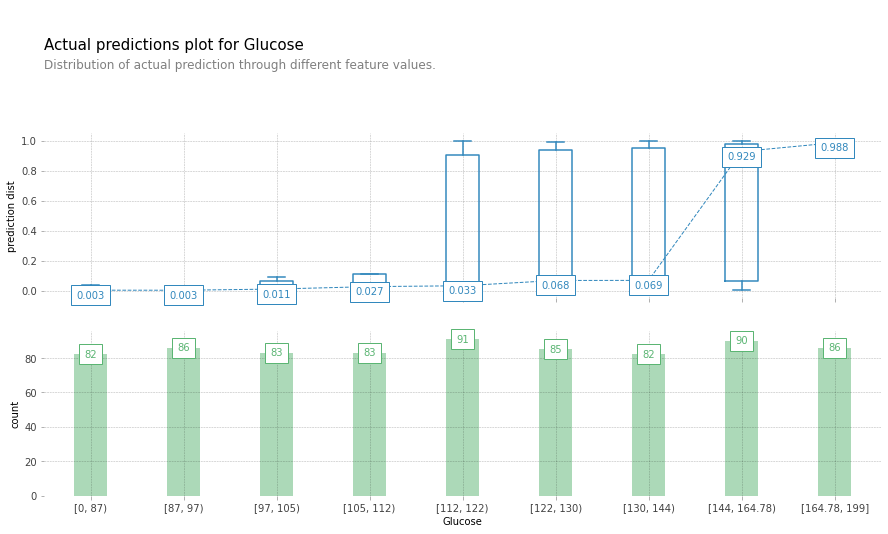

In [12]:
#GTT 데이터에 대한 모델의 실제 예측 분포 플롯을 그리는 코드 
fig, axes, summary_df = info_plots.actual_plot(
    model = model,
    X = pima_data[pima_features], 
    feature = 'Glucose',
    feature_name='Glucose',
    predict_kwds={}
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


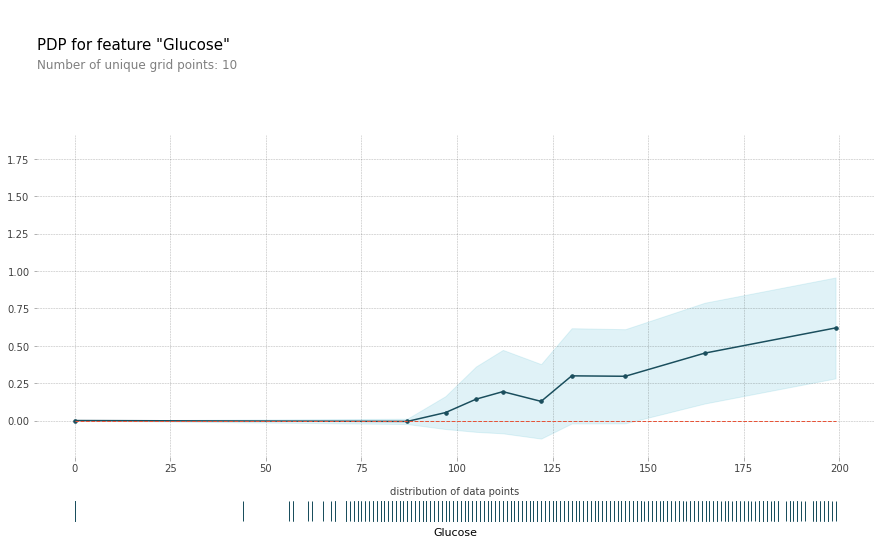

In [15]:
#GTT 테스트 피쳐에 대해 부분 의존성을 계산하고 플롯을 그리는 코드 
from pdpbox import pdp

pdp_gc =pdp.pdp_isolate(
    #pdp_isolate()객체는 pdp.pdp_isolate()을 통해 계산된 결과괎 
    model = model,
    dataset = pima_data,
    model_features = pima_features,
    feature = 'Glucose'
)
#플롯 정보 설정 
fig, axes = pdp.pdp_plot(
    pdp_gc,
    'Glucose',
    plot_lines = False,
    frac_to_plot = 0.5,
    plot_pts_dist = True
)

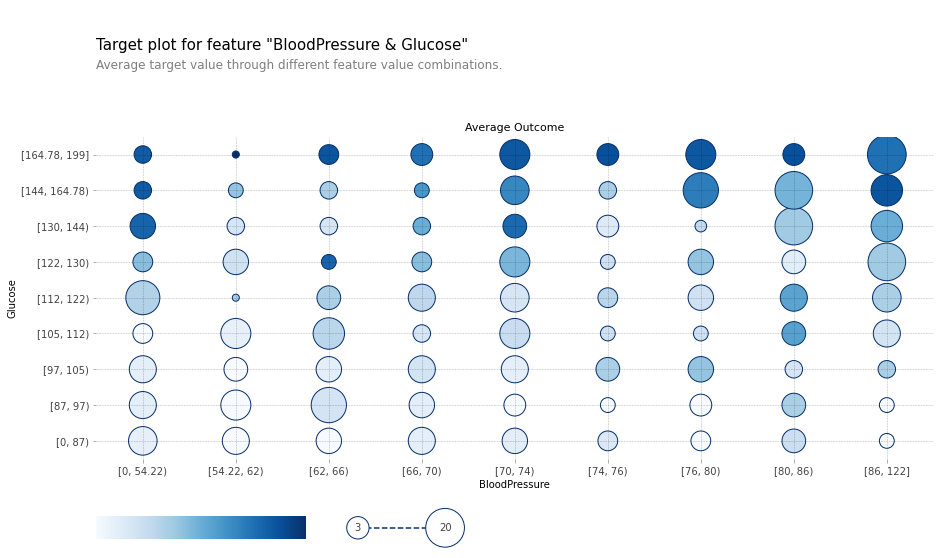

In [16]:
#혈압과 GTT 테스트 데이터 두 피쳐에 대해 목표 플롯을 그리는 코드 
fig, axes , summary_df = info_plots.target_plot_interact(
    df = pima_data,
    features = ['BloodPressure', 'Glucose'],
    feature_names = ['BloodPressure', 'Glucose'], 
    target = pima_target
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


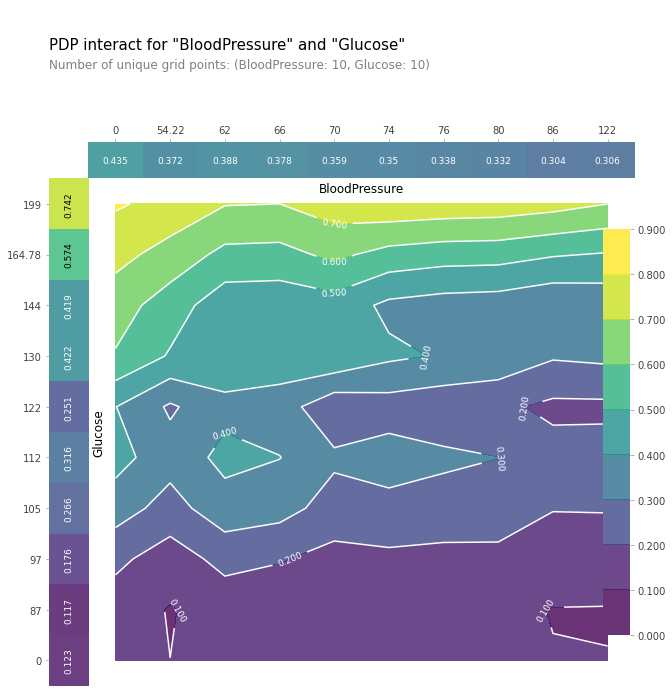

In [17]:
#혈압과 GTT 테스트 데이터로 모델에 대한 부분 의존성 플롯을 그리는 코드 
pdp_interatction = pdp.pdp_interact(
    model = model, 
    dataset= pima_data, 
    model_features = pima_features,
    features = ['BloodPressure', 'Glucose']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_interatction, 
    feature_names=['BloodPressure', 'Glucose'],
    plot_type = 'contour', 
    x_quantile=True,
    plot_pdp = True
)

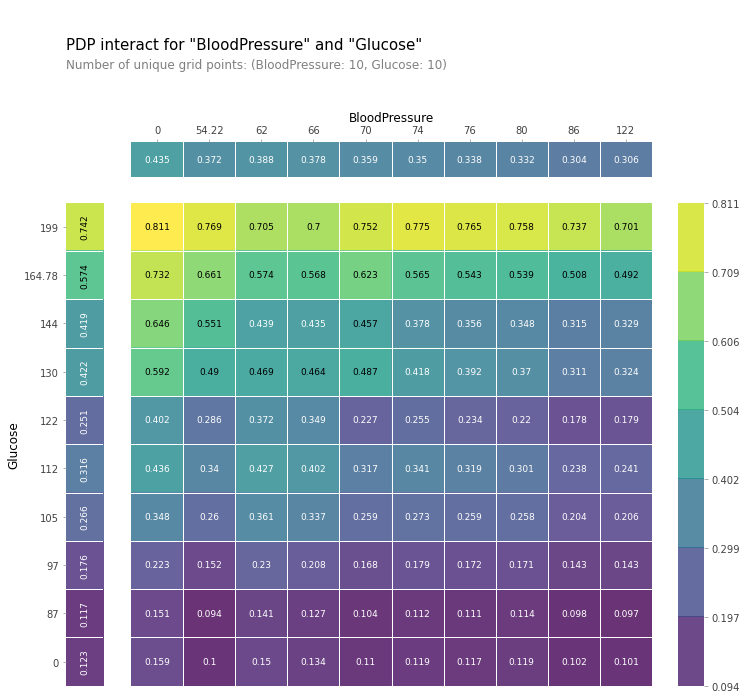

In [18]:
#혈압과 GTT 테스트 데이터로 모델에 대한 부분 의존성 플롯을 그리는 코드 
pdp_interatction = pdp.pdp_interact(
    model = model, 
    dataset= pima_data, 
    model_features = pima_features,
    features = ['BloodPressure', 'Glucose']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_interatction, 
    feature_names=['BloodPressure', 'Glucose'],
    plot_type = 'grid', 
    x_quantile=True,
    plot_pdp = True
)

In [19]:
#gridseachcv를 통해 당뇨병 진단 모델이 최적 하이퍼파라미터를 찾는 코드 
import numpy as np 
from sklearn.model_selection import GridSearchCV

cv_params = {
    'max_depth' : np.arange(1, 6, 1),#파이썬의 range 함수는 정수형에서만 작동하는 반면, numpy의 arange 함수는 실수형(float)에 대해서도 작동 
} #리스트 [1,2,3,4,5]만큼 모델을 만들고 각각의 학습 결과 비교 

fix_params = { #모델에 적용할 고정 파라미터 
    'booster' : 'gbtree',
    'objective' : 'binary:logistic',
}

csv = GridSearchCV(XGBClassifier(**fix_params),
                   cv_params,
                   scoring = 'precision',
                   cv = 5, #cross-validation 교차 검증의 횟수 
                   n_jobs = 5)

csv.fit(X_train, y_train)
print(csv.best_params_)

[14:51:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 1}
